# Objective of A/B test

Evaluate Campaign Effectiveness: Determine whether the Test campaign has statistically significant impact on conversion rates compared to Control campaign
The dataset use in these project is ('control_group.csv','test_group.csv')

# Identify Variables

the type of campaign(Control or Test) - independent variable

conversion rates - dependent variable

In [1]:
dataset_description = "marketing campaigns"  

sample_size_statement = f"The analysis was conducted on a dataset of 59 observations related to marketing campaign."

print(sample_size_statement)


The analysis was conducted on a dataset of 59 observations related to marketing campaign.


# Preparing the data

In [2]:
import pandas as pd
import datetime 
from datetime import date , timedelta

In [3]:
control_data=pd.read_csv("C:/machinelearning/control_group.csv",sep=";")
test_data=pd.read_csv("C:/machinelearning/test_group.csv",sep=";")

In [4]:
control_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702,56930,7016,2290,2159,1819,618
1,Control Campaign,2.08.2019,1757,121040,102513,8110,2033,1841,1219,511
2,Control Campaign,3.08.2019,2343,131711,110862,6508,1737,1549,1134,372
3,Control Campaign,4.08.2019,1940,72878,61235,3065,1042,982,1183,340
4,Control Campaign,5.08.2019,1835,109559,88844,5320,2221,1943,1300,522


In [5]:


print(control_data)

       Campaign Name        Date  Spend [USD]  # of Impressions   Reach  \
0   Control Campaign   1.08.2019         2280             82702   56930   
1   Control Campaign   2.08.2019         1757            121040  102513   
2   Control Campaign   3.08.2019         2343            131711  110862   
3   Control Campaign   4.08.2019         1940             72878   61235   
4   Control Campaign   5.08.2019         1835            109559   88844   
5   Control Campaign   6.08.2019         3083            109076   87998   
6   Control Campaign   7.08.2019         2544            142123  127852   
7   Control Campaign   8.08.2019         1900             90939   65217   
8   Control Campaign   9.08.2019         2813            121332   94896   
9   Control Campaign  10.08.2019         2149            117624   91257   
10  Control Campaign  11.08.2019         2490            115247   95843   
11  Control Campaign  12.08.2019         2319            116639  100189   
12  Control Campaign  13.

In [6]:
test_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [7]:
control_data.columns=["Campaign Name","Date","Amount Spend","Number of Impressions","Reach","Website Clicks","Searches recieved","Content Viewed","Added to Cart","Purchases"]
test_data.columns=["Campaign Name","Date","Amount Spend","Number of Impressions","Reach","Website Clicks","Searches recieved","Content Viewed","Added to Cart","Purchases"]

In [8]:
ab_data=control_data.merge(test_data,how="outer").sort_values(["Date"])
ab_data=ab_data.reset_index(drop=True)
print(ab_data.head())

      Campaign Name        Date  Amount Spend  Number of Impressions  Reach  \
0  Control Campaign   1.08.2019          2280                  82702  56930   
1     Test Campaign   1.08.2019          3008                  39550  35820   
2     Test Campaign  10.08.2019          2790                  95054  79632   
3  Control Campaign  10.08.2019          2149                 117624  91257   
4     Test Campaign  11.08.2019          2420                  83633  71286   

   Website Clicks  Searches recieved  Content Viewed  Added to Cart  Purchases  
0            7016               2290            2159           1819        618  
1            3038               1946            1069            894        255  
2            8125               2312            1804            424        275  
3            2277               2475            1984           1629        734  
4            3750               2893            2617           1075        668  


In our dataset the conversion rates were calculated by dividing the number of purchases by the number of website clicks for each observation and expressing the result as percentage  The 'Conversion Rate' column now represents the percentage of successful conversions for each corresponding entry, providing insights into the effectiveness of the marketing campaigns in driving user engagement and purchases

In [9]:
df=pd.DataFrame(ab_data)

df["Conversion Rate"]=(df["Purchases"]/df["Website Clicks"])*100

df.head()

,Campaign Name,Date,Amount Spend,Number of Impressions,Reach,Website Clicks,Searches recieved,Content Viewed,Added to Cart,Purchases,Conversion Rate
0,Control Campaign,1.08.2019,2280,82702,56930,7016,2290,2159,1819,618,8.808438
1,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255,8.393680
2,Test Campaign,10.08.2019,2790,95054,79632,8125,2312,1804,424,275,3.384615
3,Control Campaign,10.08.2019,2149,117624,91257,2277,2475,1984,1629,734,32.235397
4,Test Campaign,11.08.2019,2420,83633,71286,3750,2893,2617,1075,668,17.813333


Assigning binary labels to Conversion Rate 

In [10]:
threshold = 9

df["Conversion Label"] = (df["Conversion Rate"] > threshold).astype(int)

print("DataFrame with Conversion Rates:")

print(df)

DataFrame with Conversion Rates:
       Campaign Name        Date  Amount Spend  Number of Impressions   Reach  \
0   Control Campaign   1.08.2019          2280                  82702   56930   
1      Test Campaign   1.08.2019          3008                  39550   35820   
2      Test Campaign  10.08.2019          2790                  95054   79632   
3   Control Campaign  10.08.2019          2149                 117624   91257   
4      Test Campaign  11.08.2019          2420                  83633   71286   
5   Control Campaign  11.08.2019          2490                 115247   95843   
6      Test Campaign  12.08.2019          2831                 124591   10598   
7   Control Campaign  12.08.2019          2319                 116639  100189   
8      Test Campaign  13.08.2019          1972                  65827   49531   
9   Control Campaign  13.08.2019          2697                  82847   68214   
10     Test Campaign  14.08.2019          2537                  56304   2598

In [11]:
label_counts=df["Conversion Label"].value_counts()

print("The Number of Zeroes:",label_counts[0])
print("The Number of Ones:",label_counts[1])

The Number of Zeroes: 32
The Number of Ones: 28


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Campaign Name          60 non-null     object 
 1   Date                   60 non-null     object 
 2   Amount Spend           60 non-null     int64  
 3   Number of Impressions  60 non-null     int64  
 4   Reach                  60 non-null     int64  
 5   Website Clicks         60 non-null     int64  
 6   Searches recieved      60 non-null     int64  
 7   Content Viewed         60 non-null     int64  
 8   Added to Cart          60 non-null     int64  
 9   Purchases              60 non-null     int64  
 10  Conversion Rate        60 non-null     float64
 11  Conversion Label       60 non-null     int32  
dtypes: float64(1), int32(1), int64(8), object(2)
memory usage: 5.5+ KB


In [13]:
ab_data['Campaign Name'].value_counts()

Control Campaign    30
Test Campaign       30
Name: Campaign Name, dtype: int64

# Visualising the results

In [14]:
import numpy as np
import scipy.stats as stats

In [29]:
conversion_rates=ab_data.groupby('Campaign Name')['Conversion Rate']

std_p=lambda x:np.std(x,ddof=0)
se_p=lambda x:stats.sem(x,ddof=0)

conversion_rates=conversion_rates.agg([np.mean,std_p,se_p])
conversion_rates.columns=['conversion_rate','std_deviation','std_error']

conversion_rates.style.format('{:,.3f}')

,conversion_rate,std_deviation,std_error
Campaign Name,,,
Control Campaign,11.422,6.613,1.207
Test Campaign,9.231,4.374,0.799


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

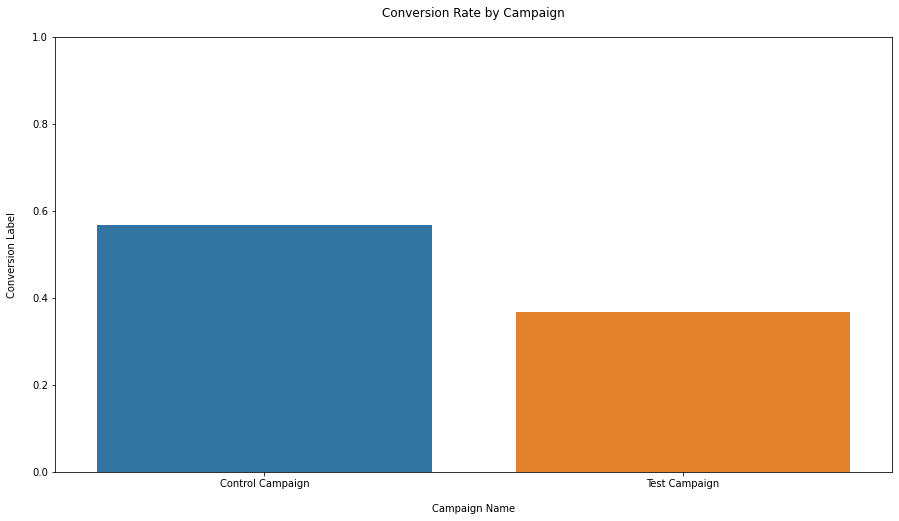

In [31]:
plt.figure(figsize=(15,8))

sns.barplot(x=ab_data['Campaign Name'],y=ab_data['Conversion Label'],ci=False)

plt.ylim(0,1)
plt.title('Conversion Rate by Campaign',pad=20)
plt.xlabel('Campaign Name',labelpad=15)
plt.ylabel('Conversion Label',labelpad=15)
plt.show()

So the control campaign 's value is higher .Is this difference statistically significant?

so as we can see the visuals and also from the stats calulated above we can conclude that the control campaign has statistically significant on conversion rates compared to test campaign.